In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest, f_classif
import pylab
import scipy
import sklearn
import time
import seaborn as sns

In [3]:
pd.set_option("display.max_rows", 250000)

In [4]:
df = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/GSE59114.csv', header = 1)
df1 = df.T
df1.columns = df1.loc['Gene Symbol'].reset_index()
df1 = df1.drop(['Gene Symbol', 'UCSC transcripts'])
df1.columns = [x[1] for x in df1.columns]
df1.columns = df1.columns.str.replace("'", "")
df1.shape

(1434, 8422)

Itgam, Ly6g, Ptprc, Cd3e, Ly76, Kit, Ly6a, Cd48, Slamf1

In [5]:
import re
df1_1 = df1[~df1.index.str.contains('biol_replicate')]
df1_1 = df1_1.drop(['\'Young LT-HSC\'','\'Young ST-HSC\'', '\'Young MPP\'','\'Old LT-HSC\'', '\'Old ST-HSC\'','Old MPP\''])
df1_1 = df1_1.drop(['Itgam', 'Ptprc', 'Kit', 'Ly6a', 'Cd48', 'Slamf1'], axis = 1)

In [6]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, young_LT_HSC_2 to old_MPP_168
Columns: 8416 entries, Npl to Sft2d1
dtypes: object(8416)
memory usage: 67.9+ MB


In [7]:
df1_1.index = df1_1.index.str.replace(r'[^a-zA-Z]', '')

print((df1_1.columns).shape)
print(np.unique(df1_1.columns).shape)

(8416,)
(8351,)


In [8]:
df1_1dup = df1_1[df1_1.loc[:,df1_1.columns.duplicated()].columns]


In [9]:
dupcols = np.unique(df1_1dup.columns)
dupcols

array(['Abcg2', 'Arih1', 'Atf7ip', 'Atrip', 'Brwd1', 'Cbx1', 'Ccnd3',
       'Cdk6', 'Celf1', 'Commd1', 'Csnk1a1', 'Ctse', 'Dnajb6', 'Eci2',
       'Eif1ax', 'Fgd4', 'Fus', 'G3bp1', 'Glod4', 'Gm10598', 'Gm13215',
       'Hjurp', 'Ikbkb', 'Ing4', 'Itga4', 'Itga6', 'Kansl2', 'Lcor',
       'Lrrc29', 'Luc7l2', 'Mafg', 'Mecom', 'Mob1a', 'Mtcp1', 'Nagk',
       'Ndufa3', 'Pafah1b1', 'Patz1', 'Pcif1', 'Pik3ip1', 'Psme4', 'Pten',
       'Ramp2', 'Rpl24', 'Rspry1', 'Satb1', 'Smarcc2', 'Srcap', 'Srsf10',
       'Sugp2', 'Taf9', 'Tex261', 'Tmem167b', 'Tmem181b-ps', 'Trappc9',
       'Trim30b', 'U2af1l4', 'Utp23', 'Wwp2', 'Zbtb20', 'Zfp708',
       'Zfp869', 'Zgpat'], dtype=object)

In [10]:
df1_1dupgroup = df1_1dup.groupby(df1_1dup.columns, axis=1).sum()

In [11]:
df1_1dupmean = pd.DataFrame()
for x in dupcols:
    df1_1dupmean[x] = df1_1dupgroup[x]/df1_1dup.columns.tolist().count(x)


In [12]:
# cols = []
# n = 1
# for x in df2dup.columns:
#     if x in cols:
#         cols.append(x+'.'+str(n))
#         n += 1
#     else:
#         cols.append(x)
#         n = 1


In [14]:
dfnodup = df1_1.loc[:,~df1_1.columns.duplicated()].drop(dupcols, axis = 1)

df2 = pd.concat([dfnodup, df1_1dupmean], axis = 1)

df2= df2.round(2)
df2.shape

(1058, 8351)

In [124]:
genefracs = (df2==0).sum()/(df2==0).count()
passindex = genefracs[genefracs < 0.95]


In [142]:
zifa = df2[passindex.index]
zifa= np.round(zifa.astype(np.float64),4)
zifa = np.array(zifa)
zifa.shape

(1058, 8240)

In [143]:
from ZIFA import ZIFA
from ZIFA import block_ZIFA

In [144]:
start_time = time.time()
Z, model_params = block_ZIFA.fitModel(zifa, 20)
print("--- %s seconds ---" % (time.time() - start_time))

Filtering out all genes which are zero in more than 95.0% of samples. To change this, change p0_thresh.
Number of blocks has been set to 16
Running block zero-inflated factor analysis with N = 1058, D = 8240, K = 20, n_blocks = 16
Block sizes [515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515]
Param change below threshold 1.000e-02 after 18 iterations
--- 2120.3475720882416 seconds ---


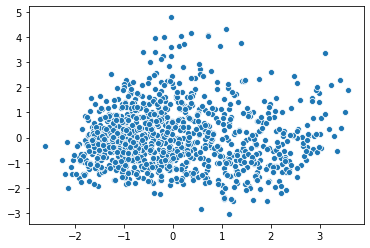

In [145]:
dfz = pd.DataFrame(Z, index = df2.index)
pcaz = PCA(n_components=2, random_state = 42)

zcomps = pcaz.fit_transform(dfz)
sns.scatterplot(zcomps[:,0], zcomps[:,1])
plt.show()

In [146]:
dfz

0         1         2         3         4         5  \
youngLTHSC -0.532490  0.306528  0.184931  0.120837 -0.111776  0.393826   
youngLTHSC -1.340168  0.565509  0.235577  0.763132 -0.356738  0.461081   
youngLTHSC -1.441539 -0.925629 -0.105870 -0.086415 -0.927523 -0.065695   
youngLTHSC  0.231806 -0.767590  0.312067  0.925338 -1.113804  0.604484   
youngLTHSC  0.895403 -0.232521  0.742385 -0.108289 -0.654309  1.163831   
youngLTHSC -0.063834 -0.655770  0.797376 -0.357349 -0.923327  1.270197   
youngLTHSC -1.686295 -0.237040 -0.574069  0.475258 -0.068227  0.085592   
youngLTHSC -1.349287 -0.671455  0.734348  0.100777 -0.739844 -0.492912   
youngLTHSC  0.014227  0.796996  0.785611  0.613682 -0.945867 -0.442822   
youngLTHSC  0.732351 -0.864899  1.344112 -0.209559 -1.737873 -0.279119   
youngLTHSC  2.892095 -0.397914  1.733625  1.137667 -0.324356  0.994578   
youngLTHSC -0.628452  0.444753  0.773670  0.637102 -0.860733 -0.388291   
youngLTHSC  0.262771  1.812827 -0.045598  0.874644 -0.131407 -0.453236   
youngLTHSC -2.126606 -0.620959  0.299084  0.889220 -1.070381  0.039955   
youngLTHSC -0.826066  0.240666  0.350222  0.389166 -0.408043 -0.125015   
youngLTHSC  2.845737  0.281406  1.670391 -0.455994 -0.595954  0.474668   
youngLTHSC  0.234749  1.508319  0.552567  0.685334 -0.122349 -0.152320   
youngLTHSC  0.984815  1.834094  0.082318  0.773614  0.679248 -1.070890   
youngLTHSC -1.394537 -0.280712  0.197012  0.920166 -0.688612 -0.628341   
youngLTHSC -0.535188 -0.474420 -0.093635  2.823542  0.762002  0.603855   
youngLTHSC  1.564871  0.223072  1.185298 -0.253089 -0.285086  0.911709   
youngLTHSC  0.094872 -0.138198  1.229056 -0.300326 -0.504062 -1.036687   
youngLTHSC  0.133876  0.713606  1.105750  0.595899 -0.849964 -0.070127   
youngLTHSC  1.061738 -2.600422  1.737467  2.515466 -0.266186 -1.019288   
youngLTHSC  0.719308 -0.711004  1.199716 -0.446054 -1.290182  0.238671   
youngLTHSC  0.642437  0.890405  1.517091  0.086484 -0.443630 -0.653964   
youngLTHSC  1.127020 -1.193388  1.447098 -0.498559 -1.005094  0.373666   
youngLTHSC  1.270560 -0.215858  1.748173 -1.345300 -0.751955  0.450856   
youngLTHSC  0.015756 -0.446708  0.629099 -0.815049 -0.335206 -0.523108   
youngLTHSC -1.571687  0.026639  0.344318  0.616454 -1.145447  0.123259   
youngLTHSC  2.017779 -0.444914  1.300732  0.826497 -0.634598  1.253188   
youngLTHSC  1.156897  0.187929  0.912334  3.410428  1.099056 -0.240309   
youngLTHSC  0.738199  0.390894  1.653716 -0.271593 -0.641059 -1.481170   
youngLTHSC -1.033779  0.716195  0.778879  1.182811 -0.229833 -0.186694   
youngLTHSC -0.554329 -1.748547  1.003888  0.481689 -0.522197 -0.250682   
youngLTHSC -0.197176  0.103210  1.202339  0.291410 -0.679008 -1.164550   
youngLTHSC -1.064298  0.727639  0.107507  0.741315  0.444631  0.008072   
youngLTHSC  1.228008 -1.434981  1.981364  0.195153 -1.307234 -0.429756   
youngLTHSC  1.963298  1.928074  0.907042  0.254959  0.661579 -1.382244   
youngLTHSC  0.774068  1.712814  0.799862  0.366105  0.504576 -0.991532   
youngLTHSC -0.755015 -0.130359  0.977903  0.401098 -1.136457 -0.373998   
youngLTHSC  1.225057  2.715247  0.934775  0.646354 -0.040616  0.522413   
youngLTHSC -1.051248  1.245793  0.272595  1.014834  0.278078  0.238981   
youngLTHSC  0.848274  1.541969  1.266492  0.515485 -0.044134 -0.785792   
youngLTHSC -0.586432  0.221471  0.561883  0.236982 -0.279363 -0.894167   
youngLTHSC -0.332844  0.580462  0.336777  0.210289  0.048463 -0.624469   
youngLTHSC  0.363110  0.614609  0.817598  0.008658 -0.274908 -0.998843   
youngLTHSC  0.209107  0.245906  0.641641 -0.507493 -0.127479 -0.452225   
youngLTHSC  0.375918  0.111649  0.739156  0.444377 -0.631390 -0.798101   
youngLTHSC  0.992945  1.186641  0.933827  0.239052  0.168709 -1.156221   
youngLTHSC -1.019463 -1.539131  0.901750 -0.303675 -0.879435 -0.970511   
youngLTHSC -0.014966  1.302195  0.594984  1.019465 -0.368702 -0.828370   
youngLTHSC  0.249087  1.712130  0.178829  1.354197  0.309314 -0.389092   
youngLTHSC  2.243753  3

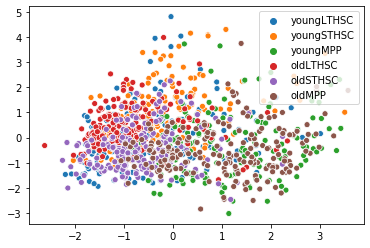

In [147]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = dfz.index)
plt.show()

In [148]:
np.cov(dfz)

array([[ 0.06679523,  0.07995678,  0.04727923, ..., -0.04279162,
        -0.05285834, -0.08715208],
       [ 0.07995678,  0.17960516,  0.10681226, ..., -0.13797028,
        -0.10866042, -0.21621863],
       [ 0.04727923,  0.10681226,  0.1902365 , ..., -0.08029559,
        -0.0158508 , -0.19632039],
       ...,
       [-0.04279162, -0.13797028, -0.08029559, ...,  0.17089207,
         0.11840695,  0.2025184 ],
       [-0.05285834, -0.10866042, -0.0158508 , ...,  0.11840695,
         0.21709857,  0.18444898],
       [-0.08715208, -0.21621863, -0.19632039, ...,  0.2025184 ,
         0.18444898,  0.37682211]])

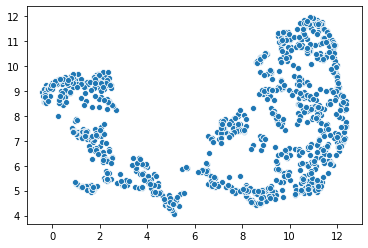

In [149]:
zumap = umap.UMAP(n_neighbors=20,
                      min_dist=.1,
                      metric='correlation').fit_transform(dfz)
sns.scatterplot(zumap[:,0], zumap[:,1])

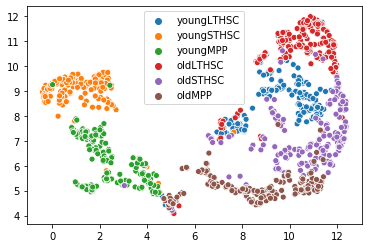

In [150]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = dfz.index)

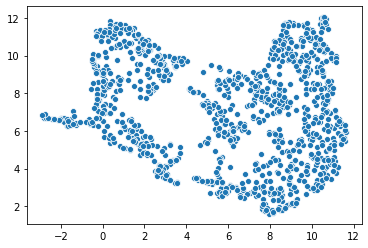

In [548]:
zumap = umap.UMAP(n_neighbors=10,
                      min_dist=.3,
                      metric='correlation').fit_transform(dfz)
sns.scatterplot(zumap[:,0], zumap[:,1])

In [151]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(dfz)
cluster = gmm.fit_predict(dfz)


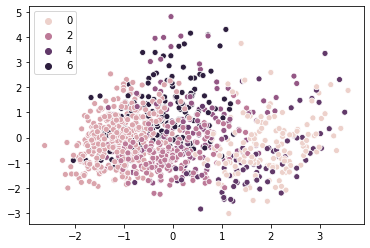

In [153]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = cluster)

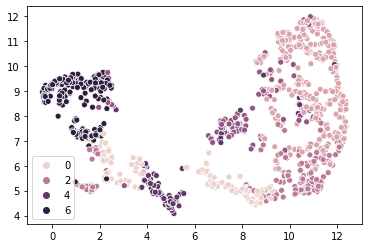

In [152]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = cluster)

In [163]:
km = KMeans(n_clusters = 6, random_state=42)
kmdata = km.fit_transform(dfz)
kpred = km.fit_predict(dfz)

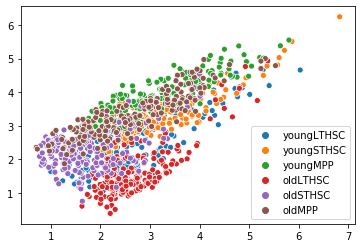

In [165]:
sns.scatterplot(kmdata[:,0], kmdata[:,1], hue = dfz.index)

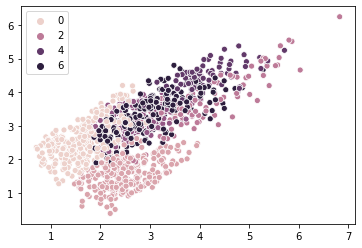

In [166]:
sns.scatterplot(kmdata[:,0], kmdata[:, 1], hue = kpred)

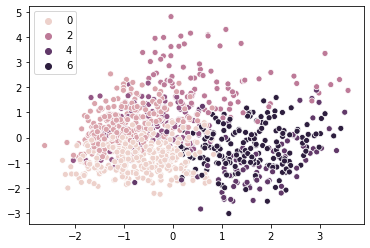

In [167]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = kpred)

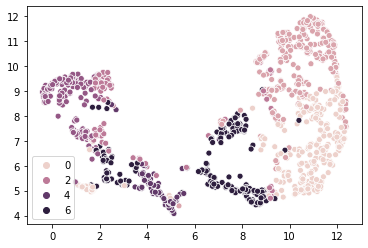

In [168]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = kpred)

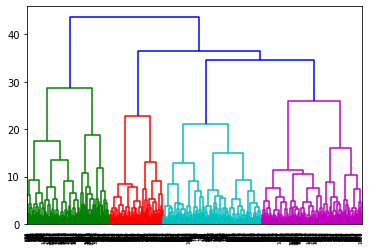

In [159]:
dendrogram(linkage(dfz, method = 'ward'))
plt.show()

In [160]:
dfcelltypes = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcelltypes['youngLTHSC'] = df2[df2.index == 'youngLTHSC'].mean()
dfcelltypes['youngSTHSC'] = df2[df2.index == 'youngSTHSC'].mean()
dfcelltypes['youngMPP'] = df2[df2.index == 'youngMPP'].mean()
dfcelltypes['oldLTHSC'] = df2[df2.index == 'oldLTHSC'].mean()
dfcelltypes['oldSTHSC'] = df2[df2.index == 'oldSTHSC'].mean()
dfcelltypes['oldMPP'] = df2[df2.index == 'oldMPP'].mean()


In [161]:
dfcellbroad = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcellbroad['HSC'] = df2[df2.index.str.contains('HSC')].mean()
dfcellbroad['MPP'] = df2[df2.index.str.contains('MPP')].mean()
dfcellbroad['HSC/MPP'] = dfcellbroad['HSC']/dfcellbroad['MPP']
dfcellbroad.sort_values(by = ['HSC/MPP','HSC','MPP'], ascending = False).head(25000)


All cell average  \
Efna1                                                       0.643544   
Epor                                                        0.195877   
A230065H16Rik                                               0.188853   
Entpd2                                                      0.118546   
uc012bnh.1                                                  0.012621   
Chst2                                                       0.390360   
Tenc1                                                       0.414738   
Sytl5                                                       0.261054   
Smtnl1                                                      0.344110   
Fkbp10                                                      0.207363   
Trim47                                                      0.618175   
Sdpr                                                        1.132630   
Prom2                                                       0.127064   
Gstm2                                                       0.393672   
Cldn5                                                       0.133280   
Nupr1                                                       2.090327   
Gpx3                                                        0.422264   
D630039A03Rik                                               0.693411   
Plxdc2                                                      0.888490   
Clip3                                                       0.347333   
Pde6h                                                       0.221191   
uc007cvp.1,uc007cvq.1                                       0.324404   
Snrpn                                                       0.428033   
Upp1                                                        0.927185   
Gm13986                                                     0.386996   
Ndn                                                         1.065439   
Tgm2                                                        2.373461   
Sult1a1                                                     1.656241   
Hid1                                                        0.731313   
Tgfb3                                                       0.188622   
Zfp612                                                      0.548159   
Eno2                                                        0.214290   
Hba-a2                                                      0.698456   
Mt2                                                         0.389157   
Tinagl1                                                     1.058981   
Reep2                                                       0.324417   
Ehd3                                                        0.907648   
Fam46c                                                      0.120244   
Fam110c                                                     0.711369   
Abcg3                                                       2.109270   
Clca1                                                       0.969792   
Vwf                                                         1.211336   
Clec1a                                                      1.491799   
Hbb-b1                                                      0.696732   
Kazald1                                                     0.335396   
Ocln                                                        0.451780   
Rprm                                                        0.116883   
Npdc1                                                       1.094193   
Mmrn1                                                       4.407780   
Clu                                                         1.038810   
Wfdc2                                                       0.509162   
Grb10                                                       2.193117   
Rhd                                                         0.059553   
Hgfac                                                       0.722850   
Gimap4                                                      0.461725   
Abcb1a              